<a href="https://colab.research.google.com/github/Alvaro-Garcia-Parra/AA_GRUPO3/blob/main/LAB01_Pr3Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importación de librerías a utilizar
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend import frequent_patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Lectura de la base de datos
filename = 'olimpiadas.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data.dtypes)
data

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
# Creamos el nuevo dataset con las variables necesarias
data = data[['Sex','Age','Height','Weight','Games','Sport','Medal']]
data.drop_duplicates()
data

,Sex,Age,Height,Weight,Games,Sport,Medal
0,M,24.0,180.0,80.0,1992 Summer,Basketball,NaN
1,M,23.0,170.0,60.0,2012 Summer,Judo,NaN
2,M,24.0,NaN,NaN,1920 Summer,Football,NaN
3,M,34.0,NaN,NaN,1900 Summer,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,1988 Winter,Speed Skating,NaN
...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,1976 Winter,Luge,NaN
271112,M,27.0,176.0,59.0,2014 Winter,Ski Jumping,NaN
271113,M,27.0,176.0,59.0,2014 Winter,Ski Jumping,NaN
271114,M,30.0,185.0,96.0,1998 Winter,Bobsleigh,NaN


In [5]:
data.info(verbose=True, null_counts=True)

<ipython-input-5-c1a516913eb1>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     271116 non-null  object 
 1   Age     261642 non-null  float64
 2   Height  210945 non-null  float64
 3   Weight  208241 non-null  float64
 4   Games   271116 non-null  object 
 5   Sport   271116 non-null  object 
 6   Medal   39783 non-null   object 
dtypes: float64(3), object(4)
memory usage: 14.5+ MB


In [6]:
data = data.drop(data[np.isnan(data['Age'])].index)
data = data.drop(data[np.isnan(data['Weight'])].index)
data = data.drop(data[np.isnan(data['Height'])].index)
data['Medal'].fillna('None', inplace = True)

In [7]:
data.info(verbose=True, null_counts=True)

<ipython-input-7-c1a516913eb1>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 0 to 271115
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     206165 non-null  object 
 1   Age     206165 non-null  float64
 2   Height  206165 non-null  float64
 3   Weight  206165 non-null  float64
 4   Games   206165 non-null  object 
 5   Sport   206165 non-null  object 
 6   Medal   206165 non-null  object 
dtypes: float64(3), object(4)
memory usage: 12.6+ MB


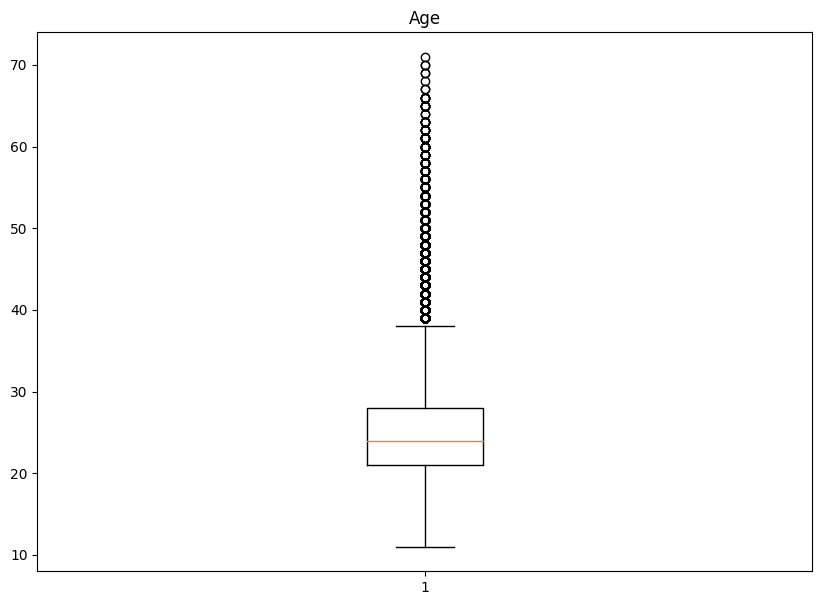

In [8]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Age"])
ax.set_title('Age')

# Dibujar gráfico
plt.show()

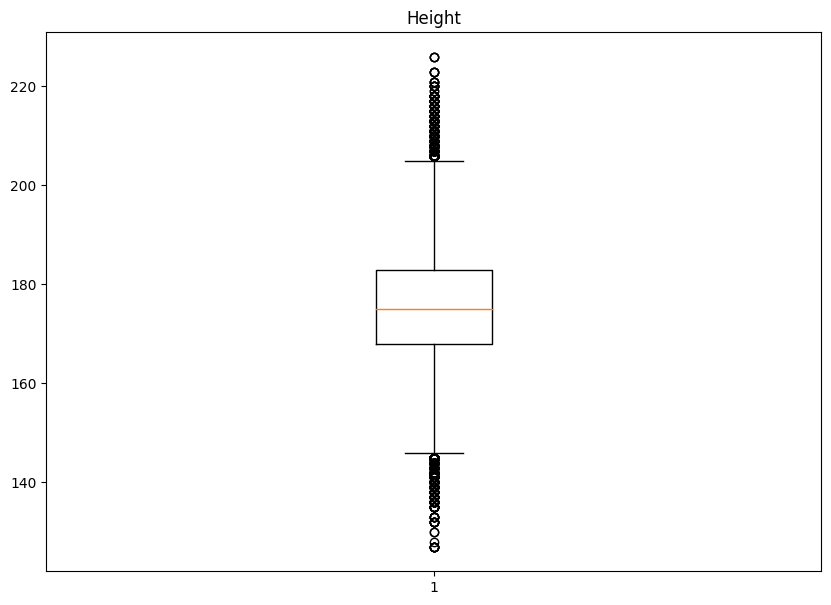

In [9]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Height"])
ax.set_title('Height')

# Dibujar gráfico
plt.show()

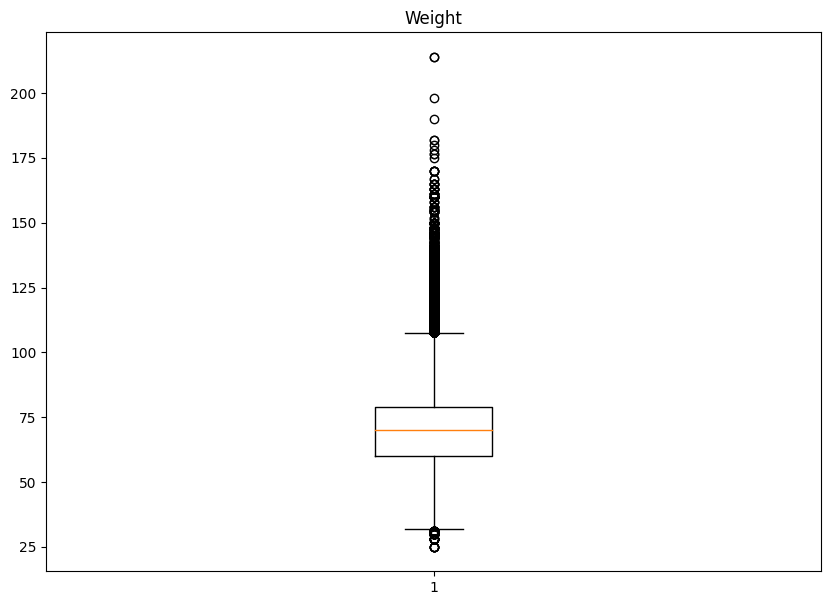

In [10]:
# Vemos los outliers

fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["Weight"])
ax.set_title('Weight')

# Dibujar gráfico
plt.show()

In [11]:
from math import floor
from math import ceil

# Discretizamos la edad, la altura y el peso en 3 intervalos

# Edad
# calcular el rango en el que vamos a dividir las edades  
max = data['Age'].max()
min = data['Age'].min()
rango_edad = (max-min)/3

conditions = [(data['Age'] < min + rango_edad),
              ((data['Age'] >= min + rango_edad) & (data['Age'] < max - rango_edad)),
              (data['Age'] >= max - rango_edad)]

results = ["Joven","Edad media","Mayor"]

data['Age'] = np.select(conditions, results)

# Height
max = data['Height'].max()
min = data['Height'].min()
rango_altura = (max-min)/3

conditions = [(data['Height'] < min + rango_altura),
              ((data['Height'] >= min + rango_altura) & (data['Height'] < max - rango_altura)),
              (data['Height'] >= max - rango_altura)]

results = ["Bajo","Medio","Alto"]

data['Height'] = np.select(conditions, results)

# Weight
# calcular el rango intercuartílico  
max = data['Weight'].max()
min = data['Weight'].min()
rango_peso = (max-min)/3

conditions = [(data['Weight'] < min + rango_peso),
              ((data['Weight'] >= min + rango_peso) & (data['Weight'] < max - rango_peso)),
              (data['Weight'] >= max - rango_peso)]

results = ["Delgado","En forma","Pesado"]

data['Weight'] = np.select(conditions, results)

In [12]:
data.head(10)

,Sex,Age,Height,Weight,Games,Sport,Medal
0,M,Joven,Medio,Delgado,1992 Summer,Basketball,None
1,M,Joven,Medio,Delgado,2012 Summer,Judo,None
4,F,Joven,Medio,Delgado,1988 Winter,Speed Skating,None
5,F,Joven,Medio,Delgado,1988 Winter,Speed Skating,None
6,F,Joven,Medio,Delgado,1992 Winter,Speed Skating,None
7,F,Joven,Medio,Delgado,1992 Winter,Speed Skating,None
8,F,Joven,Medio,Delgado,1994 Winter,Speed Skating,None
9,F,Joven,Medio,Delgado,1994 Winter,Speed Skating,None
10,M,Edad media,Medio,Delgado,1992 Winter,Cross Country Skiing,None
11,M,Edad media,Medio,Delgado,1992 Winter,Cross Country Skiing,None


In [13]:
# Convertir los datos de tipo string a valores numéricos utilizando la codificación one-hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Antes de nada definimos lo que es la etiqueta (y) y nuestros individuos
data = data[:5000]
X = data.drop(['Medal'], axis = 1)
y = data['Medal']

encoder = OneHotEncoder()
X = encoder.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Distance euclidean
Distance manhattan
Distance hamming
Distance minkowski
+---+-----------+--------------------+
| K |  Distance |      Accuracy      |
+---+-----------+--------------------+
| 3 | euclidean | 0.8215999999999999 |
| 5 | euclidean | 0.8645999999999999 |
| 7 | euclidean |       0.8804       |
| 9 | euclidean |       0.8784       |
| 3 | manhattan | 0.8215999999999999 |
| 5 | manhattan | 0.8645999999999999 |
| 7 | manhattan |       0.8804       |
| 9 | manhattan |       0.8784       |
| 3 |  hamming  | 0.8213999999999999 |
| 5 |  hamming  |       0.865        |
| 7 |  hamming  |        0.88        |
| 9 |  hamming  | 0.8830000000000001 |
| 3 | minkowski | 0.8215999999999999 |
| 5 | minkowski | 0.8645999999999999 |
| 7 | minkowski |       0.8804       |
| 9 | minkowski |       0.8784       |
+---+-----------+--------------------+


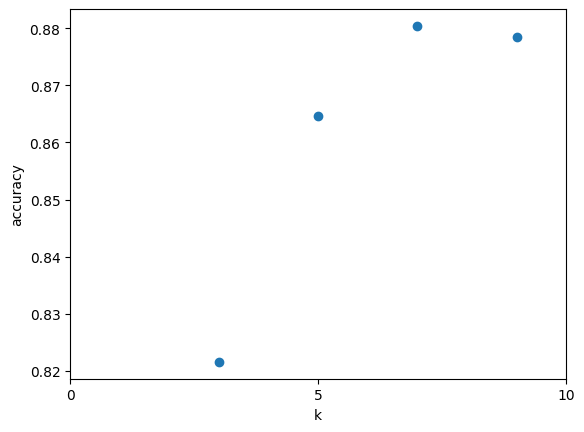

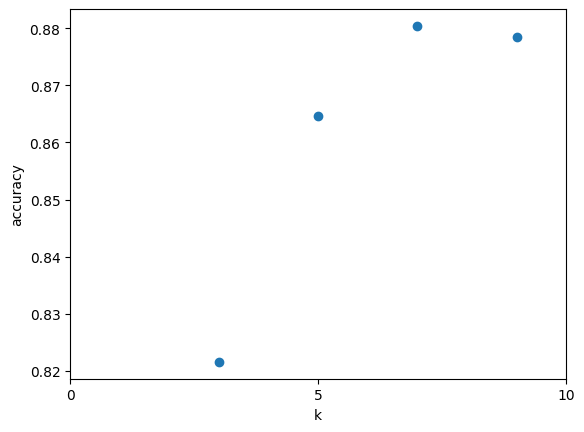

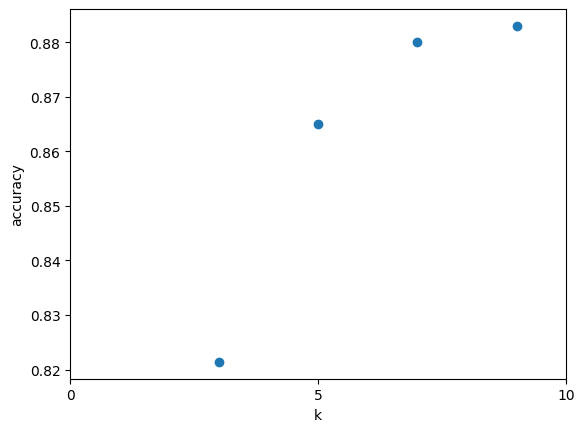

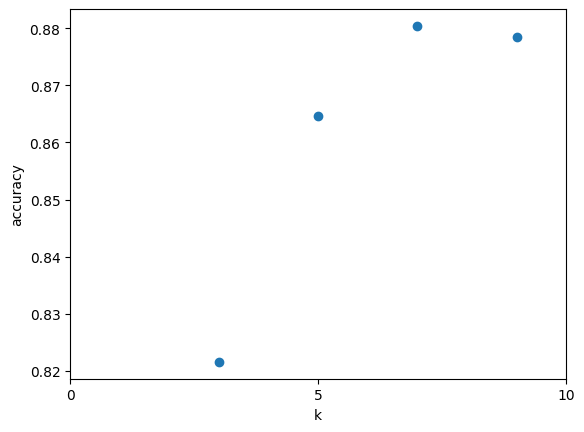

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, accuracy_score

k_range = [3,5,7,9]
distancias = ['euclidean', 'manhattan', 'hamming', 'minkowski']

# Creación de la tabla
tabla = PrettyTable()
tabla.field_names = ["K","Distance","Accuracy"]

for d in distancias:
  k_scores = []
  index = 0
  for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k, metric = d)
      scores = cross_val_score(knn, X, y, cv=4, scoring='accuracy')
      k_scores.append(scores.mean())

      tabla.add_row([k,d,k_scores[index]])
      index = index + 1

  print("Distance",d)
  plt.figure()
  plt.xlabel('k')
  plt.ylabel('accuracy')
  plt.scatter(k_range, k_scores)
  plt.xticks([0,5,10])

print(tabla)

In [81]:
# Cogemos el número de vecinos que mayor precisión tenga

def mayor(lista):
    max = lista[0];
    for x in lista:
        if x >= max:
            max = x
    return max

n_vecinos = k_scores.index(mayor(k_scores))

In [82]:
from sklearn.metrics import accuracy_score

# Distancia euclidea
knn = KNeighborsClassifier(n_neighbors= n_vecinos)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy with Euclidean distance:', acc)

# Distancia manhattan
knn = KNeighborsClassifier(n_neighbors= n_vecinos, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy with Manhattan distance:', acc)

# Distancia hamming
knn = KNeighborsClassifier(n_neighbors= n_vecinos, metric='hamming')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy with Hamming distance:', acc)

Accuracy with Euclidean distance: 0.8832
Accuracy with Manhattan distance: 0.8832
Accuracy with Hamming distance: 0.8816


In [48]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.88


In [50]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

pred = classifier.predict(X_test) 
print(confusion_matrix(y_test, pred)) 
print(classification_report(y_test, pred))

[[   0    0   58    0]
 [   1    4   47    0]
 [   1    2 1099    2]
 [   0    1   34    1]]
              precision    recall  f1-score   support

      Bronze       0.00      0.00      0.00        58
        Gold       0.57      0.08      0.14        52
        None       0.89      1.00      0.94      1104
      Silver       0.33      0.03      0.05        36

    accuracy                           0.88      1250
   macro avg       0.45      0.28      0.28      1250
weighted avg       0.82      0.88      0.84      1250

